## we will continue to check all the feature from the last notebook to select those worthy of studying
4. Variable types (categorical and numerical)
5. Numerical variables
    - Continuous
    - Distributions
6. Categorical variables
    - Cardinality
    - Discrete
    - Rare Labels

In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data_backup = pd.read_csv('loan_data_modeling_feature_selection.csv')

In [3]:
pd.options.display.max_columns = None
loan_data = loan_data_backup.copy()
loan_data.head()

,Unnamed: 0,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,initial_list_status,collections_12_mths_ex_med,application_type,tot_coll_amt,open_acc_6m,il_util,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,good_bad,mths_since_last_credit_pull_d,mths_credit_history
0,0,3600.0,36,13.99,C,C4,10.0,MORTGAGE,55000.0,Not Verified,debt_consolidation,PA,5.91,0.0,1.0,0.0,2765.0,w,0.0,Individual,722.0,2.0,36.0,722.0,34.0,3.0,1.0,4.0,0.0,0.0,148.0,128.0,1.0,4.0,4.0,2.0,3.0,0.0,0.0,76.9,0.0,0.0,1,1.0,148.0
1,1,24700.0,36,11.99,C,C1,10.0,MORTGAGE,65000.0,Not Verified,small_business,SD,16.06,1.0,4.0,0.0,21470.0,w,0.0,Individual,0.0,1.0,73.0,6472.0,29.0,0.0,0.0,6.0,0.0,0.0,113.0,192.0,4.0,2.0,0.0,0.0,6.0,0.0,0.0,97.4,0.0,0.0,1,1.0,192.0
2,2,20000.0,60,10.78,B,B4,10.0,MORTGAGE,63000.0,Not Verified,home_improvement,IL,10.78,0.0,0.0,0.0,7869.0,w,0.0,Joint App,0.0,0.0,73.0,2081.0,65.0,2.0,5.0,1.0,0.0,0.0,125.0,184.0,5.0,101.0,10.0,0.0,6.0,0.0,0.0,100.0,0.0,0.0,1,1.0,184.0
3,3,35000.0,60,14.85,C,C5,10.0,MORTGAGE,110000.0,Source Verified,debt_consolidation,NJ,17.06,0.0,0.0,0.0,7802.0,w,0.0,Individual,0.0,1.0,70.0,6987.0,45.0,0.0,1.0,0.0,0.0,0.0,36.0,87.0,1.0,2.0,NaN,0.0,2.0,0.0,0.0,100.0,0.0,0.0,1,1.0,87.0
4,4,10400.0,60,22.45,F,F1,3.0,MORTGAGE,104433.0,Source Verified,major_purchase,PA,25.37,1.0,3.0,0.0,21929.0,w,0.0,Individual,0.0,1.0,84.0,9702.0,78.0,2.0,1.0,3.0,0.0,0.0,128.0,210.0,6.0,4.0,1.0,0.0,10.0,0.0,0.0,96.6,0.0,0.0,1,13.0,210.0


In [4]:
loan_data.drop('Unnamed: 0', axis=1, inplace=True)

## 4. Variable types (categorical and numerical)

In [5]:
# let's identify the categorical variables
# we will capture those of type *object*

cat_vars = [var for var in loan_data.columns if loan_data[var].dtype == 'O']

# number of categorical variables
len(cat_vars)

8

In [6]:
# now let's identify the numerical variables

num_vars = [
    var for var in loan_data.columns if var not in cat_vars and var != 'good_bad'
]

# number of numerical variables
len(num_vars)

35

#### prepare for analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
loan_data['loan_status'] = np.where(loan_data['good_bad']==0, "bad", "good")

In [9]:
def plot_feature(df, col_name, isContinuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12,9), dpi=90)
    # Plot without loan status
    if isContinuous:
        sns.histplot(df.loc[(df.loan_status=='good')& (df[col_name].notnull()),
                            col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df.loc[df.loan_status=='good'][col_name], order=sorted(df[col_name].unique()),
                      color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name + ": status good")
    plt.xticks(rotation = 90)
    
    if isContinuous:
        sns.histplot(df.loc[(df.loan_status=='bad')& (df[col_name].notnull()),
                            col_name], kde=False, ax=ax2)
    else:
        sns.countplot(df.loc[df.loan_status=='bad'][col_name], order=sorted(df[col_name].unique()),
                      color='#5975A4', saturation=1, ax=ax2)
    ax2.set_xlabel(col_name)
    ax2.set_ylabel('Count')
    ax2.set_title(col_name + ": status bad")
    plt.xticks(rotation = 90)

    # Plot with loan status
    if isContinuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax3)
        ax3.set_ylabel('')
        ax3.set_title(col_name + ' by Loan Status')
    else:
        data = df.groupby(col_name)['loan_status'].value_counts(normalize=True).to_frame('proportion').reset_index()        
        sns.barplot(x = col_name, y = 'proportion', hue= "loan_status", data = data, saturation=1, ax=ax3)
        ax3.set_ylabel('Loan fraction')
        ax3.set_title('Loan status')
        plt.xticks(rotation = 90)
    ax3.set_xlabel(col_name)
    
    plt.tight_layout()
    plt.show()

## 5. Numerical variables

In [10]:
from sklearn.feature_selection import f_classif

#### ANOVA F-Statistic for numerical features

In [11]:
vars_with_na = [var for var in loan_data[num_vars].columns if loan_data[num_vars][var].isnull().sum() > 0]
loan_data[vars_with_na].isnull().mean().sort_values(ascending=False)

il_util                          5.343583e-01
all_util                         4.613992e-01
inq_last_12m                     4.613459e-01
total_cu_tl                      4.613459e-01
open_acc_6m                      4.613459e-01
inq_fi                           4.613453e-01
max_bal_bc                       4.613453e-01
mths_since_recent_inq            1.068023e-01
num_tl_120dpd_2m                 4.251332e-02
mo_sin_old_il_acct               2.947487e-02
mths_since_recent_bc             1.002142e-02
dti                              3.468054e-04
pct_tl_nvr_dlq                   9.164289e-05
mths_since_last_credit_pull_d    3.773531e-05
inq_last_6mths                   5.989731e-07
dtype: float64

In [12]:
# since f_class_if does not accept missing values, we will do a very crude imputation of missing values
num = loan_data[num_vars]
by_max = ['mths_since_last_credit_pull_d', 'mths_since_recent_bc', 'mo_sin_old_il_acct']

by_0=['il_util', 'all_util', 'inq_last_12m', 'open_acc_6m', 'inq_fi', 'inq_last_6mths',
      'max_bal_bc', 'total_cu_tl']
by_mean = [var for var in vars_with_na if var not in by_0]

for var in by_max:
    num[var].fillna(num[var].max(), inplace = True)
for var in by_0:
    num[var].fillna(0, inplace = True)
    
for var in by_mean:
    num[var].fillna(num[var].mean(), inplace = True)


In [13]:
# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(num[num_vars], loan_data['good_bad'])
# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': num[num_vars].columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table

,Numerical_Feature,F-Score,p values
0,int_rate,90313.645538,0.000000
1,mths_since_last_credit_pull_d,85315.619744,0.000000
2,term,18187.793965,0.000000
3,inq_last_6mths,10425.173715,0.000000
4,dti,5496.685910,0.000000
5,mths_since_recent_inq,5362.561552,0.000000
6,max_bal_bc,5103.954508,0.000000
7,mort_acc,4933.097804,0.000000
8,mo_sin_old_rev_tl_op,4212.164929,0.000000
9,mths_credit_history,2670.845237,0.000000


In [14]:
columns_to_drop = ANOVA_F_table.Numerical_Feature.tolist()[-15:]

In [15]:
columns_to_drop

['il_util',
 'inq_fi',
 'delinq_2yrs',
 'total_cu_tl',
 'num_il_tl',
 'collections_12_mths_ex_med',
 'num_accts_ever_120_pd',
 'num_tl_90g_dpd_24m',
 'tax_liens',
 'mo_sin_old_il_acct',
 'pct_tl_nvr_dlq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'num_tl_120dpd_2m',
 'tot_coll_amt']

In [16]:
loan_data.drop(columns_to_drop, axis = 1, inplace=True)

**we then check how many unique values the numerical variable has: if it's less than 20, we can treat it as categorical variables for feature selection.**

In [17]:
cat_vars = [var for var in loan_data.columns if loan_data[var].dtype == 'O' and var != 'loan_status']

In [18]:
num_vars = [
    var for var in loan_data.columns if var not in cat_vars and (var != 'good_bad' and var != 'loan_status')
]

In [19]:
print("number of unique values in variable")
for var in num_vars:
    print(var + " : " + str(len(loan_data[var].unique())))

number of unique values in variable
loan_amnt : 1560
term : 2
int_rate : 292
emp_length : 11
annual_inc : 74124
dti : 8311
inq_last_6mths : 8
pub_rec : 42
revol_bal : 92524
open_acc_6m : 20
max_bal_bc : 30872
all_util : 184
inq_last_12m : 44
mo_sin_old_rev_tl_op : 769
mort_acc : 45
mths_since_recent_bc : 515
mths_since_recent_inq : 27
pub_rec_bankruptcies : 12
mths_since_last_credit_pull_d : 78
mths_credit_history : 733


In [20]:
add_to_cats = ["term", "emp_length", "inq_last_6mths", "pub_rec_bankruptcies"]

In [21]:
num_vars_n = [var for var in num_vars if var not in add_to_cats]
cat_vars.extend(add_to_cats)

In [22]:
corr = loan_data[num_vars_n].corr(method = 'spearman')

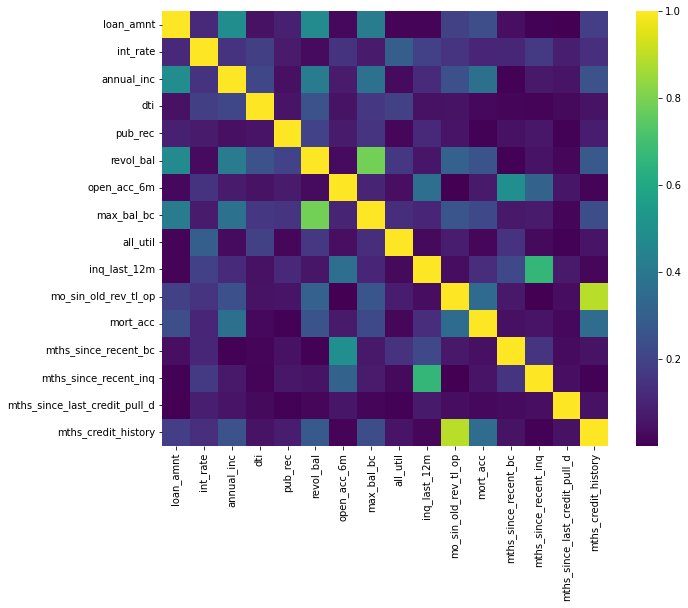

In [23]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr.abs(), cmap ='viridis' )
plt.show()

In [24]:
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr.correlation > 0.4]

,level_0,level_1,correlation
250,mths_credit_history,mo_sin_old_rev_tl_op,0.893082
117,max_bal_bc,revol_bal,0.787869
217,mths_since_recent_inq,inq_last_12m,0.661230
198,mths_since_recent_bc,open_acc_6m,0.493674
32,annual_inc,loan_amnt,0.487156
80,revol_bal,loan_amnt,0.476625
82,revol_bal,annual_inc,0.413741
112,max_bal_bc,loan_amnt,0.412177


In [25]:
high_colinear = ["mo_sin_old_rev_tl_op", "max_bal_bc", "inq_last_12m"]
loan_data.drop(high_colinear, axis=1, inplace=True)

In [26]:
for var in high_colinear:
    num_vars_n.remove(var)
    
columns_to_drop.extend(high_colinear)
len(num_vars_n)

12

#### let's run a Kolmogorov–Smirnov test to check if the distribution for good and bad loan are indeed different

In [27]:

from scipy.stats import ks_2samp

In [28]:
for var in num_vars_n:
    print (var)
    good = loan_data[loan_data.loan_status == "good"][var].dropna().tolist()
    bad = loan_data[loan_data.loan_status == "bad"][var].dropna().tolist()
    print(ks_2samp(good, bad))

loan_amnt
Ks_2sampResult(statistic=0.06217140139312266, pvalue=0.0)
int_rate
Ks_2sampResult(statistic=0.258000481491516, pvalue=0.0)
annual_inc
Ks_2sampResult(statistic=0.07366772360174512, pvalue=0.0)
dti
Ks_2sampResult(statistic=0.09713830117910977, pvalue=0.0)
pub_rec
Ks_2sampResult(statistic=0.033780552788394536, pvalue=9.208769488257401e-218)
revol_bal
Ks_2sampResult(statistic=0.02981664252077265, pvalue=9.4952473144566e-170)
all_util
Ks_2sampResult(statistic=0.08732524736044806, pvalue=0.0)
mort_acc
Ks_2sampResult(statistic=0.07360816256681119, pvalue=0.0)
mths_since_recent_bc
Ks_2sampResult(statistic=0.07392126521899234, pvalue=0.0)
mths_since_recent_inq
Ks_2sampResult(statistic=0.07188191820168921, pvalue=0.0)
mths_since_last_credit_pull_d
Ks_2sampResult(statistic=0.3377641806727397, pvalue=0.0)
mths_credit_history
Ks_2sampResult(statistic=0.05443605764624759, pvalue=0.0)


#### plot the good versus bad loan distribution

In [29]:
print(num_vars_n)

['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'pub_rec', 'revol_bal', 'all_util', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'mths_since_last_credit_pull_d', 'mths_credit_history']


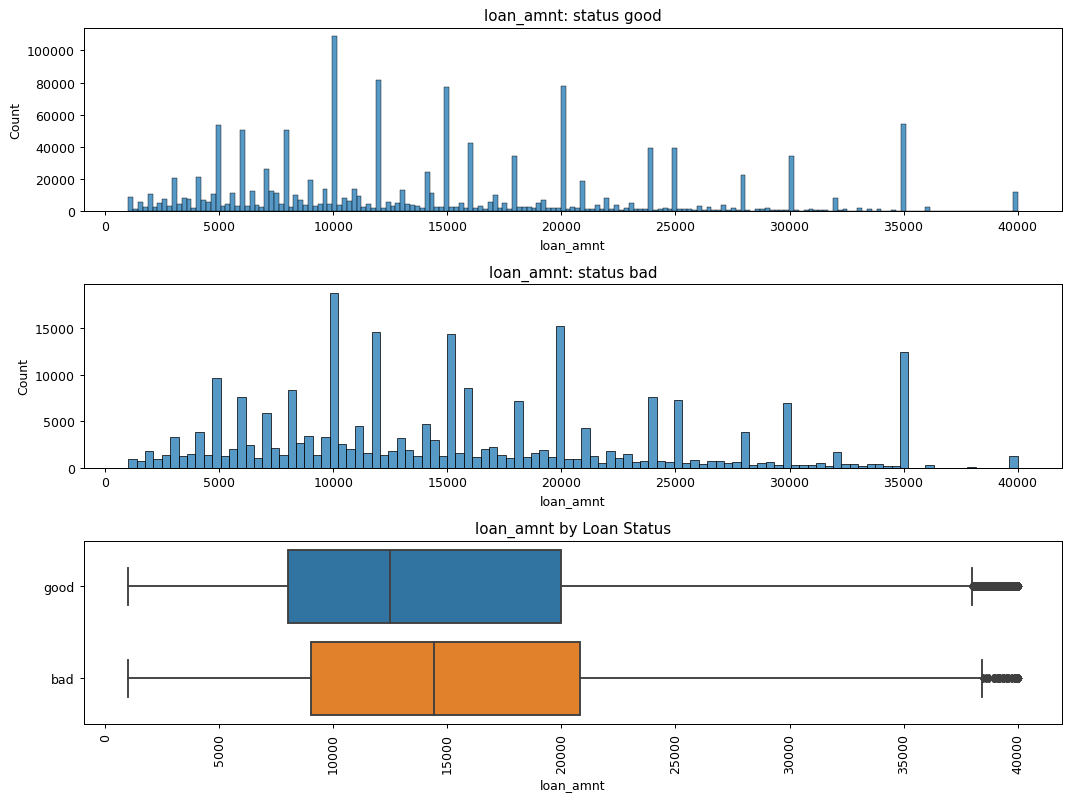

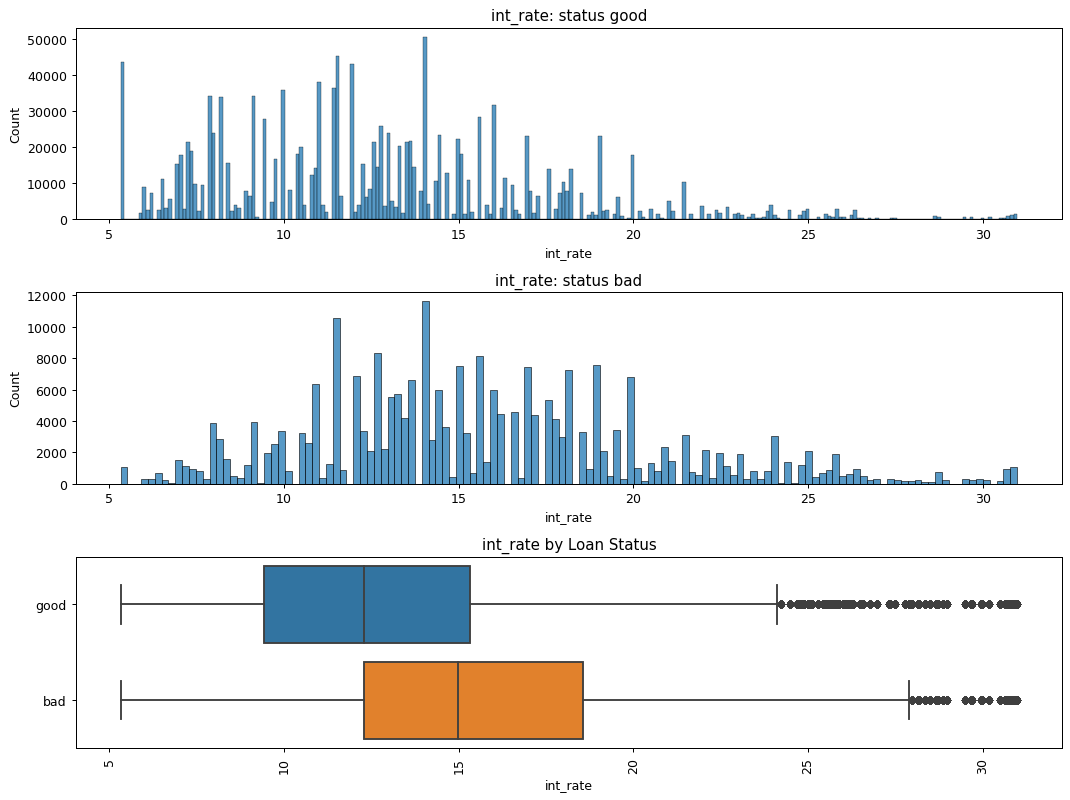

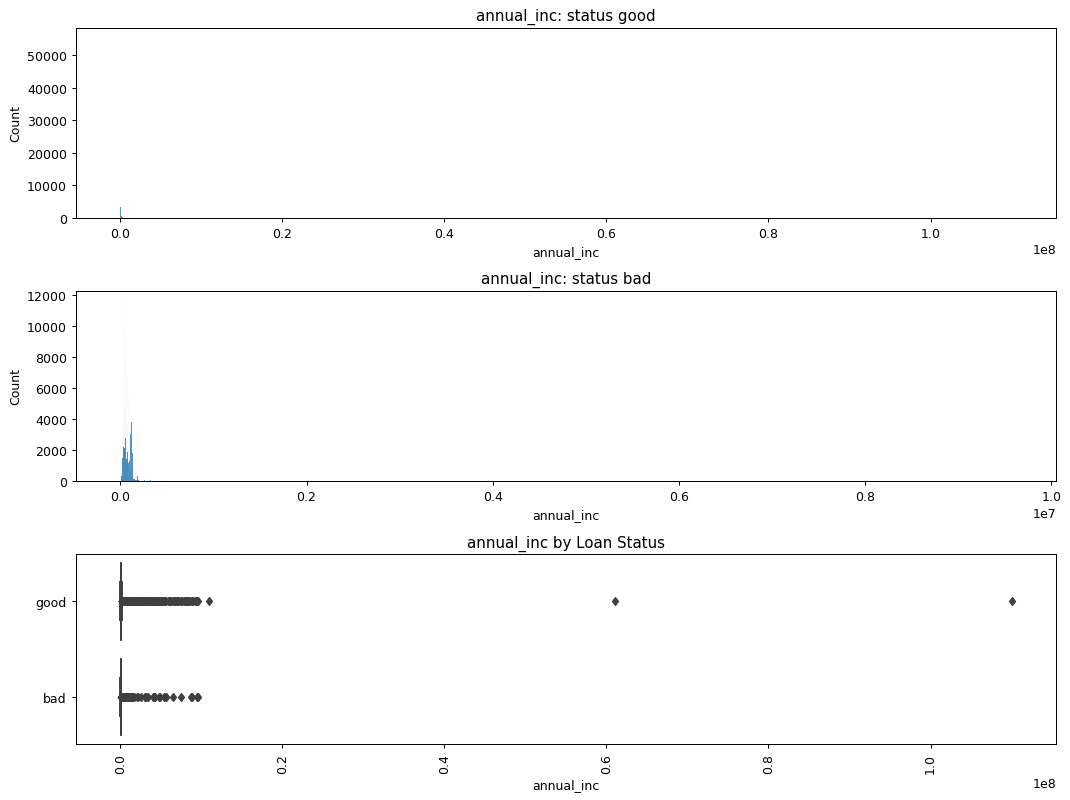

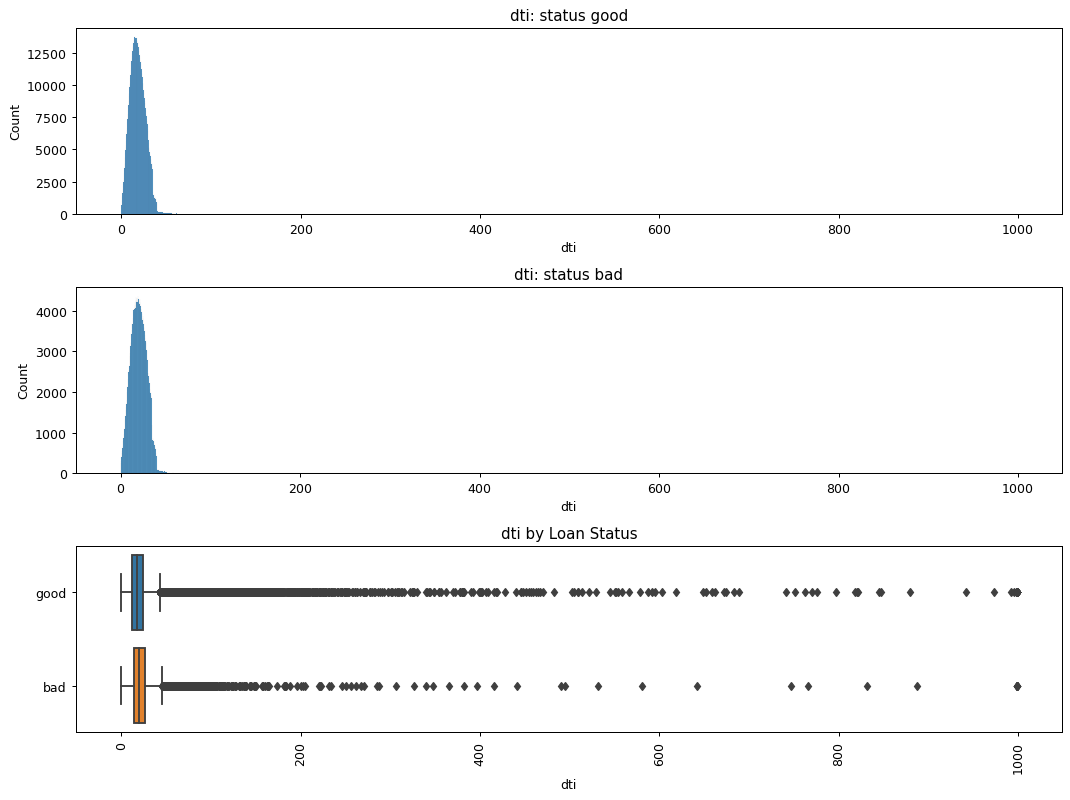

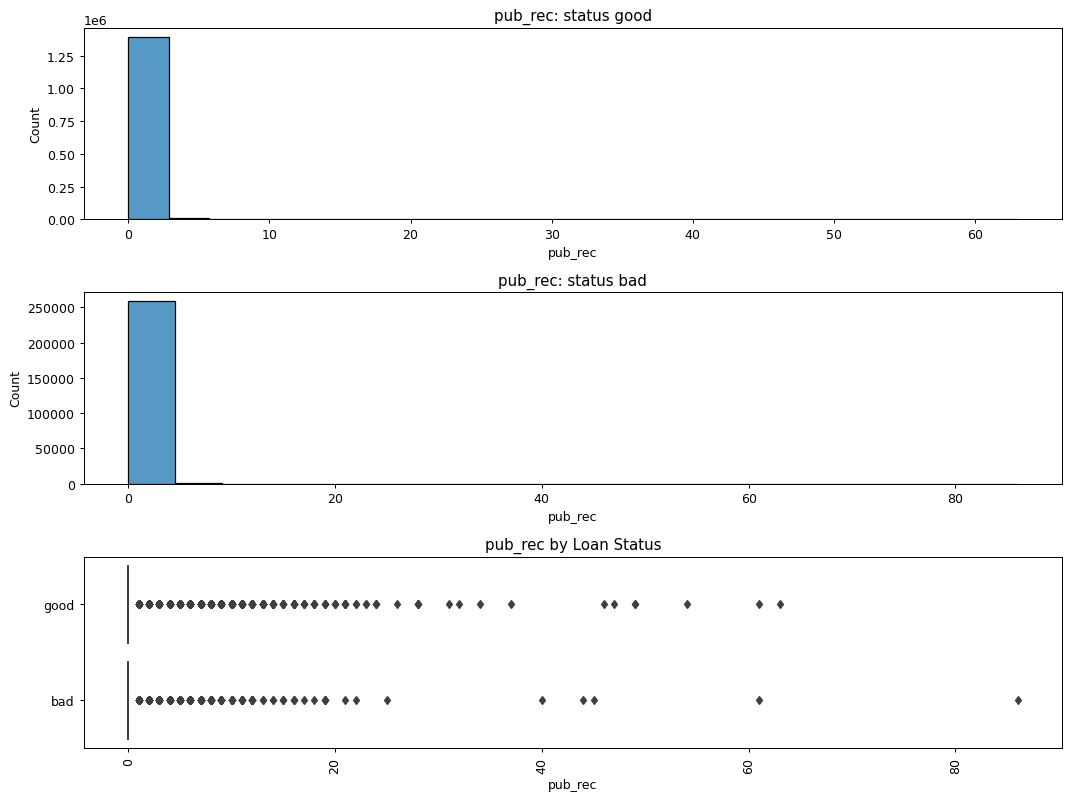

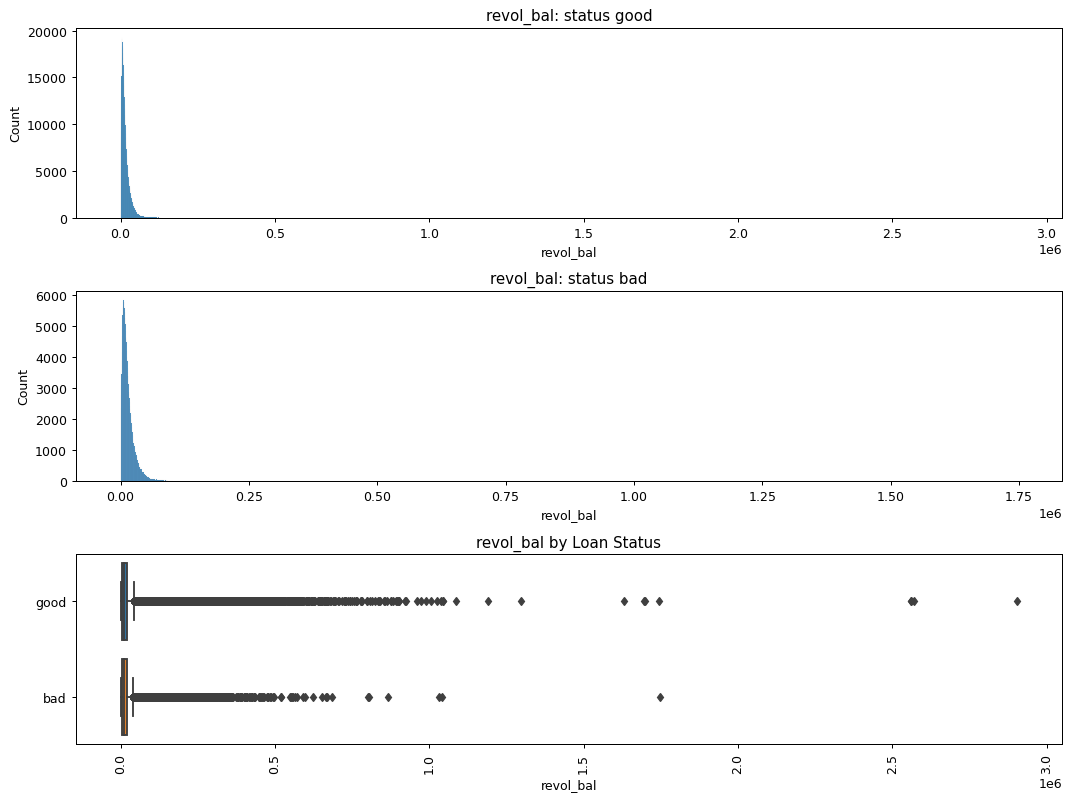

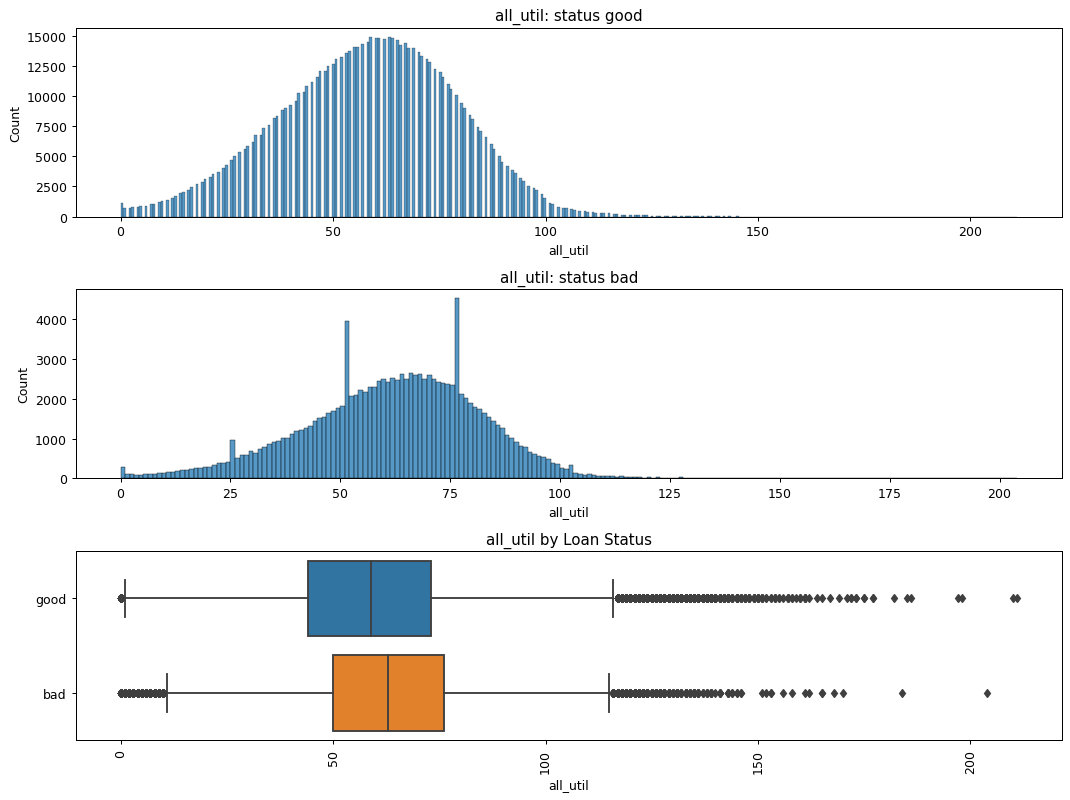

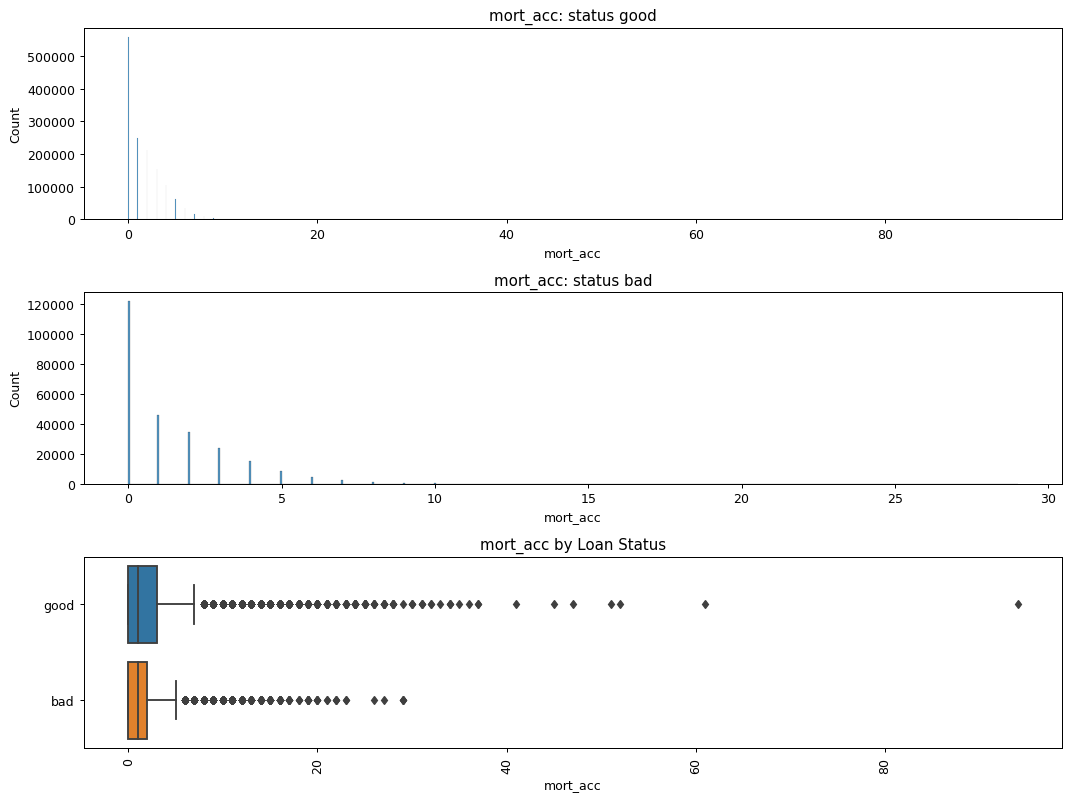

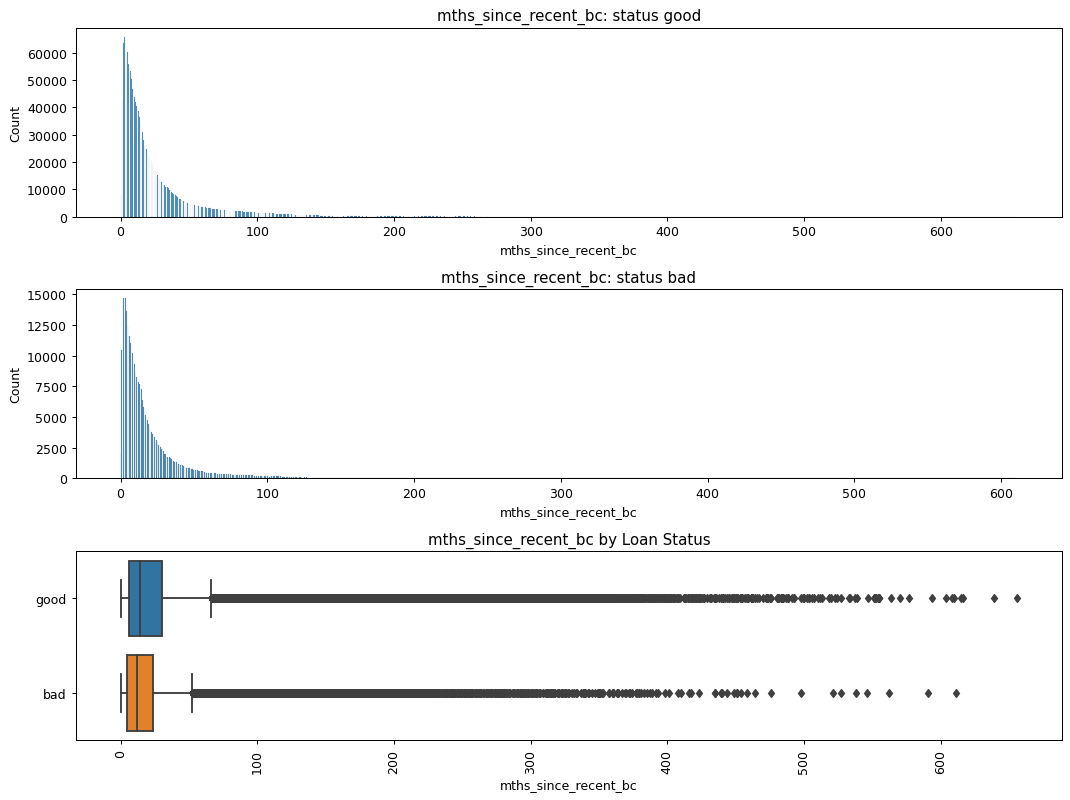

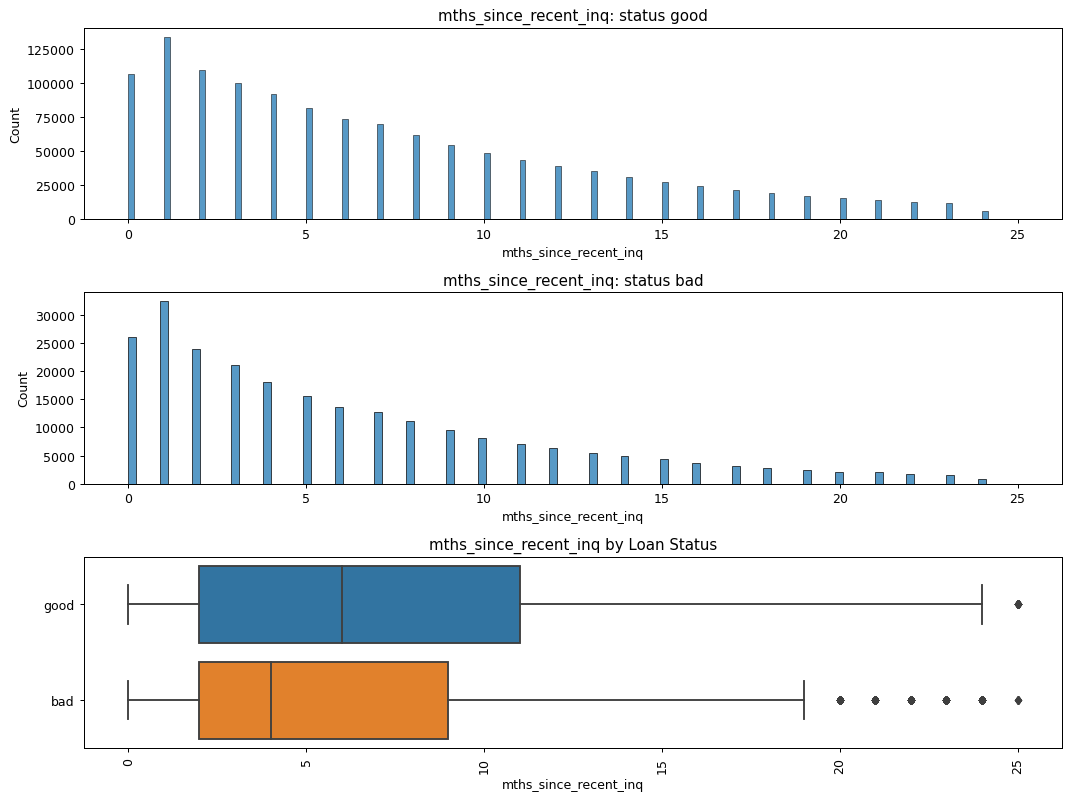

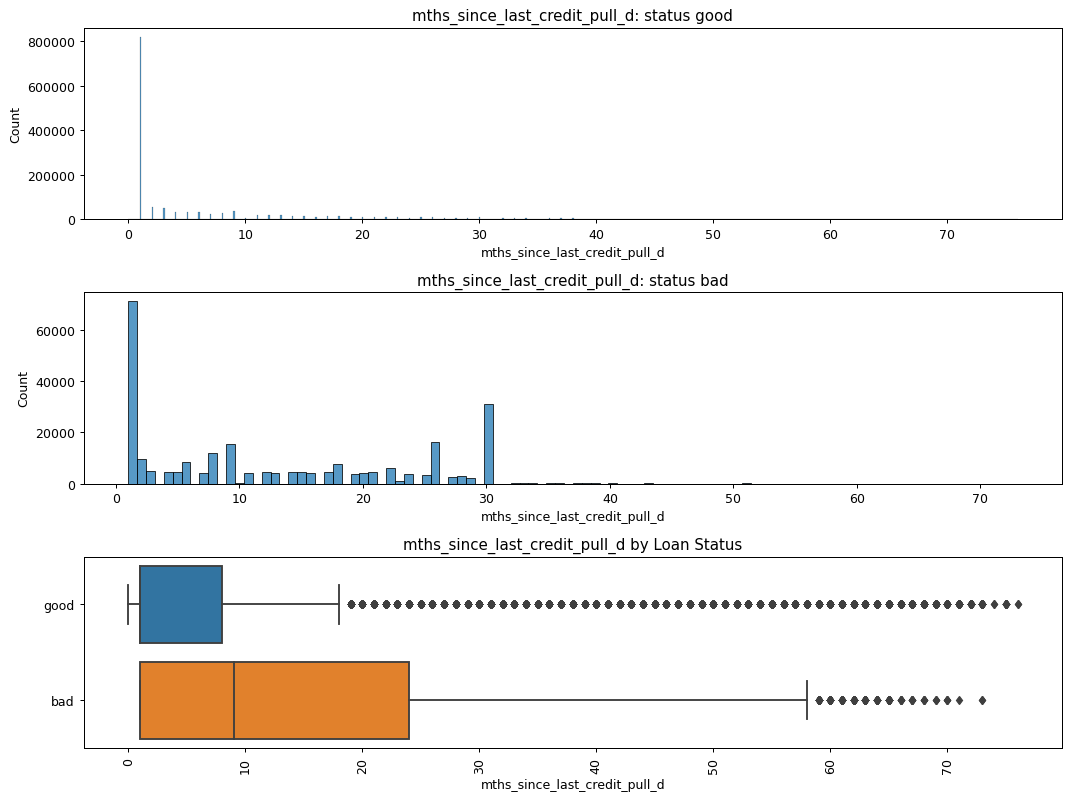

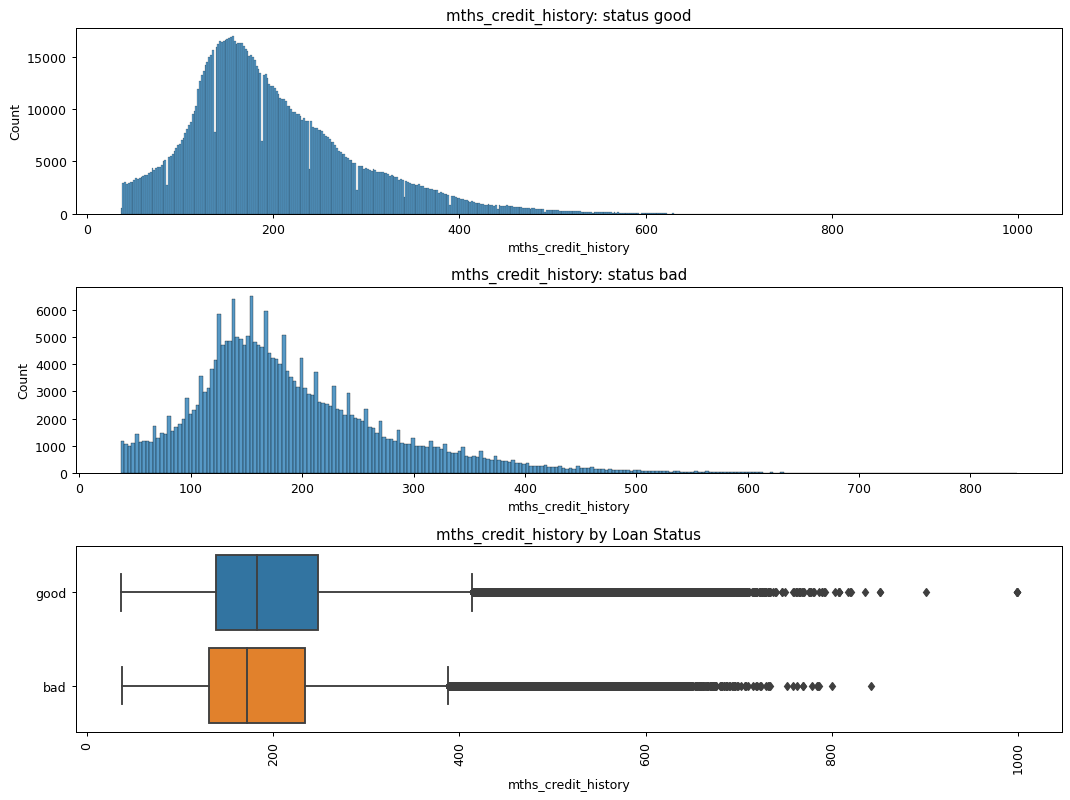

In [30]:
for var in num_vars_n:
    plot_feature(loan_data, var, True)

**there are some obviously good features, like loan amount and interests rate**

**for the rest of the variables, we check skewed distribution (or those with outliers).**

In [31]:
sum(loan_data.annual_inc>=200000)/loan_data.loan_amnt.count()

0.0272317139496048

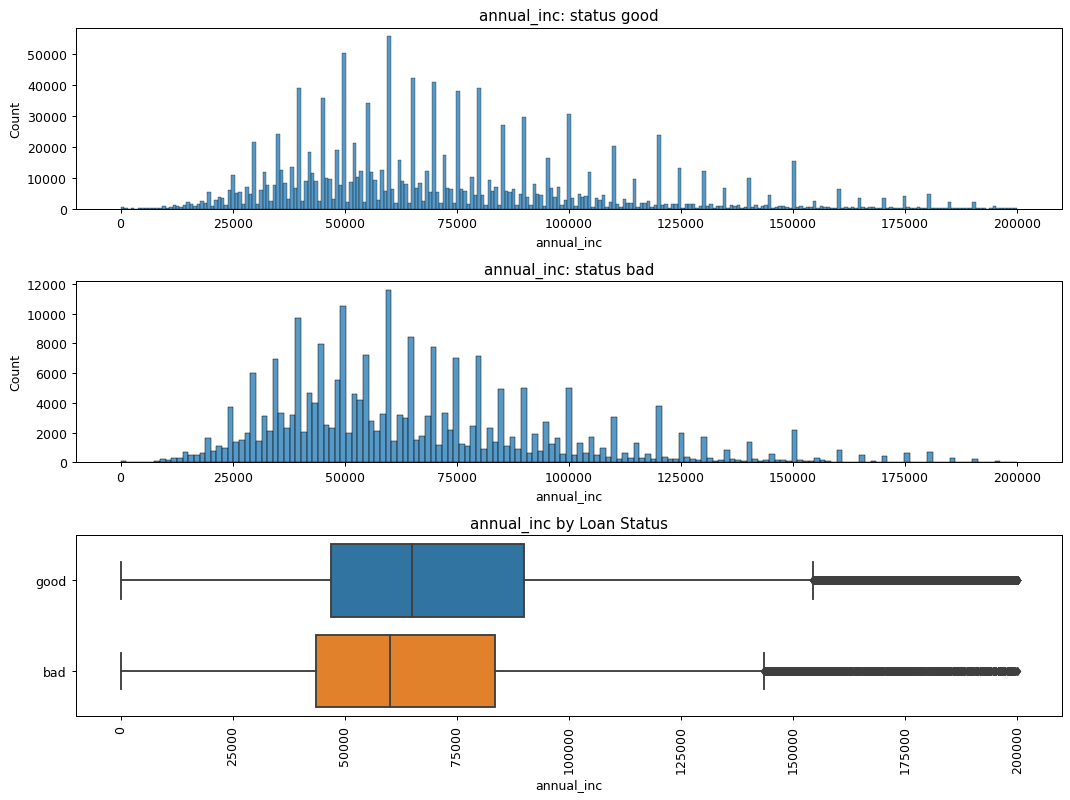

In [32]:
inc = loan_data[loan_data.annual_inc<200000][["annual_inc", 'loan_status']]
plot_feature(inc, 'annual_inc', True)

In [33]:
sum(loan_data.dti>=60)/loan_data.loan_amnt.count()

0.0019412718834829568

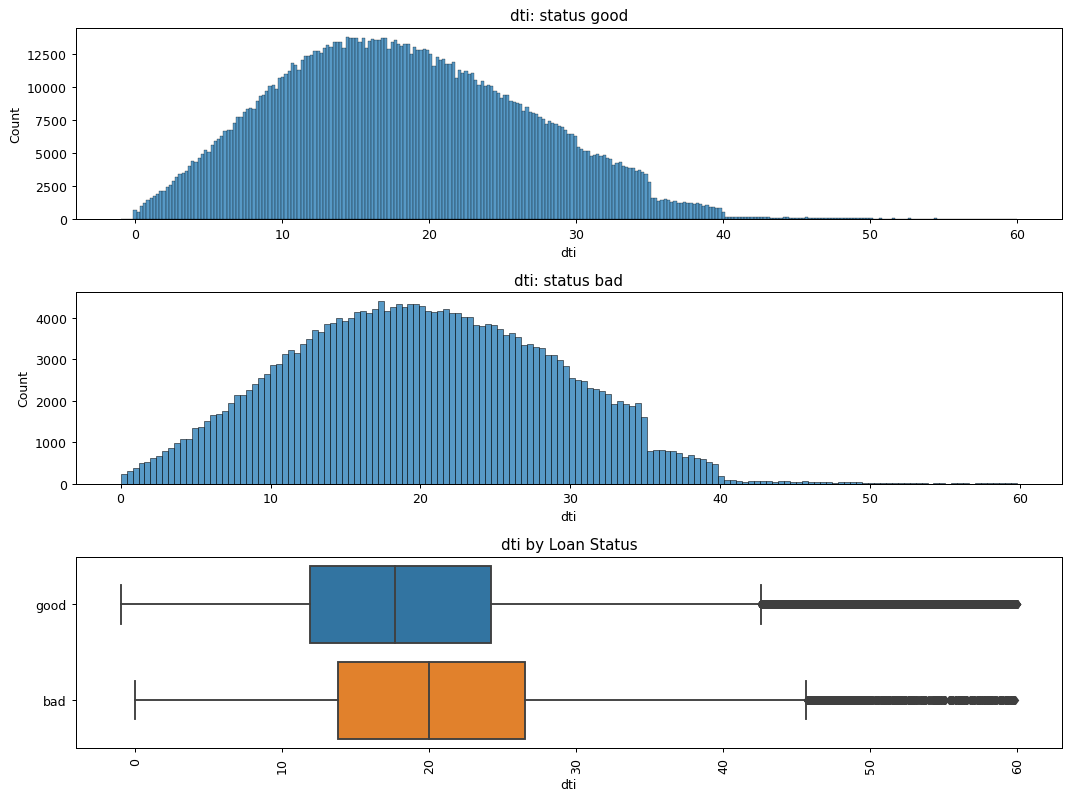

In [34]:
dti = loan_data[loan_data.dti<60][["dti", 'loan_status']]
plot_feature(dti, 'dti', True)

In [35]:
sum(loan_data.pub_rec>=1)/loan_data.loan_amnt.count()

0.17432932979699603

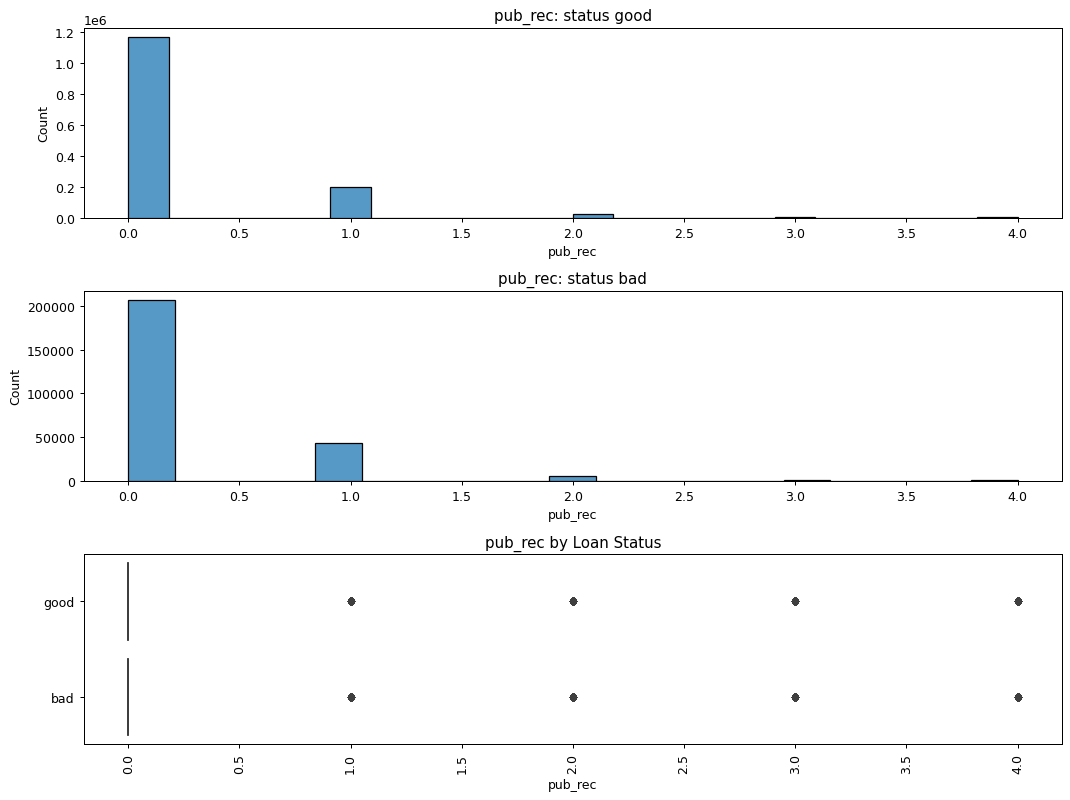

In [36]:
pub_rec = loan_data[loan_data.pub_rec<5][["pub_rec", 'loan_status']]
plot_feature(pub_rec, 'pub_rec', True)

In [37]:
#transform it to a categorical variable
loan_data['pub_rec'] = np.where(loan_data['pub_rec']==0, 'N', 'Y')

In [38]:
sum(loan_data.revol_bal>=100000)/loan_data.loan_amnt.count()

0.009875269837390777

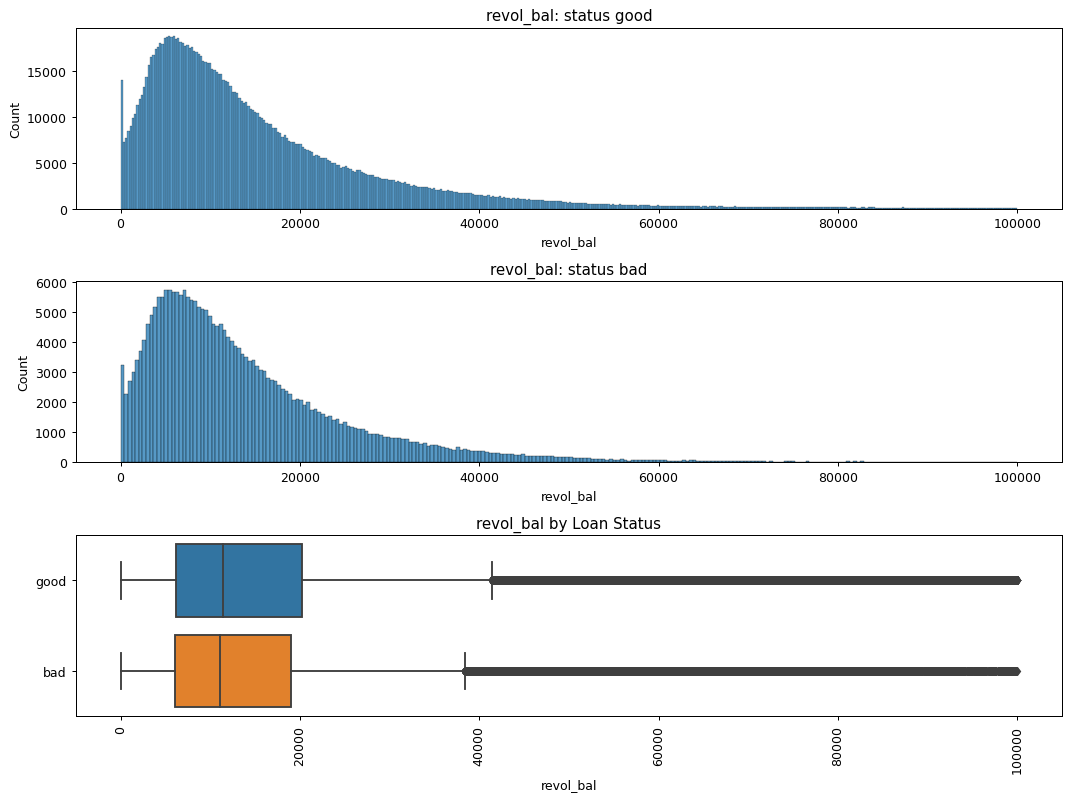

In [39]:
revol_bal = loan_data[loan_data.revol_bal<100000][["revol_bal", 'loan_status']]
plot_feature(revol_bal, 'revol_bal', True)

## 6.categorical variables

#### Chi-squared statistic for categorical features

In [40]:
from scipy.stats import chi2_contingency
cat_vars.append('pub_rec')

chi2_check = {}


# loop over each column in the training set to calculate chi-statistic with the target variable
for var in cat_vars:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(loan_data['good_bad'], loan_data[var]))
    chi2_check.setdefault('Feature',[]).append(var)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

# convert the dictionary to a DF
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result

,Feature,p-value
0,grade,0.0
1,sub_grade,0.0
2,home_ownership,0.0
3,verification_status,0.0
4,purpose,0.0
5,addr_state,0.0
6,initial_list_status,0.0
7,application_type,0.0
8,term,0.0
9,emp_length,0.0


#### let's keep top 8

In [41]:
low_p = ["inq_last_6mths", "pub_rec_bankruptcies", "pub_rec"]
loan_data.drop(low_p, axis=1, inplace=True)
columns_to_drop.extend(low_p)

In [42]:
cat_vars.remove("inq_last_6mths")
cat_vars.remove("pub_rec_bankruptcies")
cat_vars.remove("pub_rec")


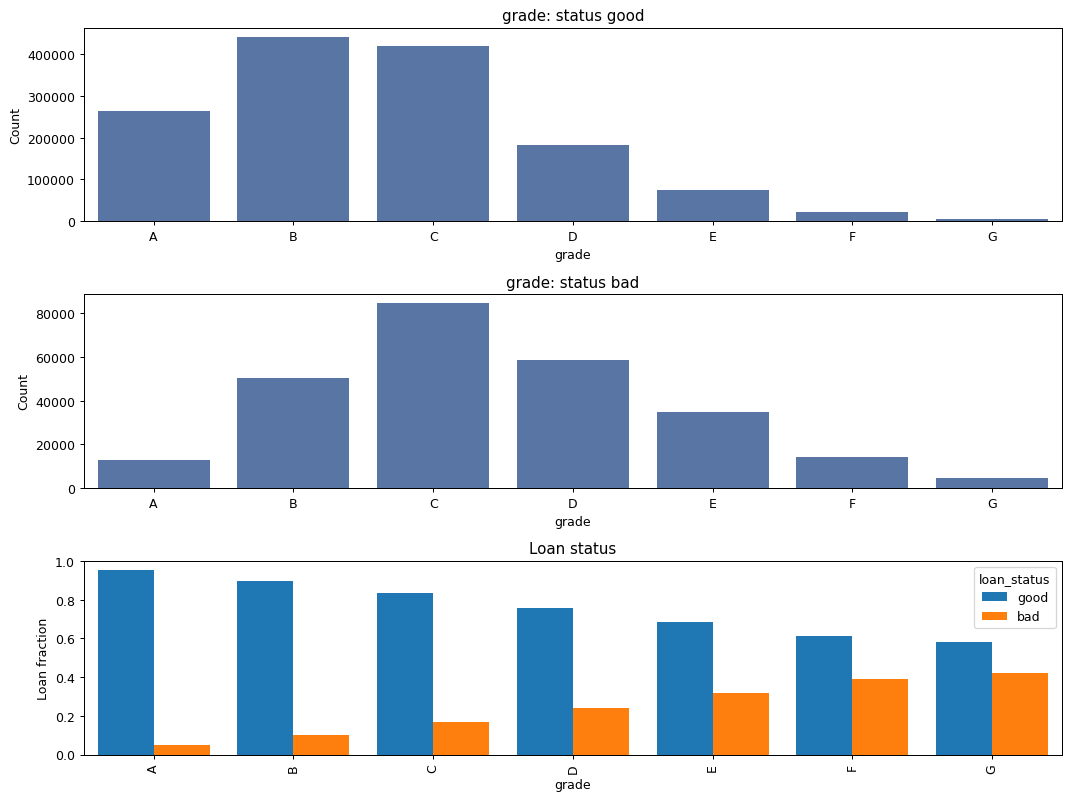

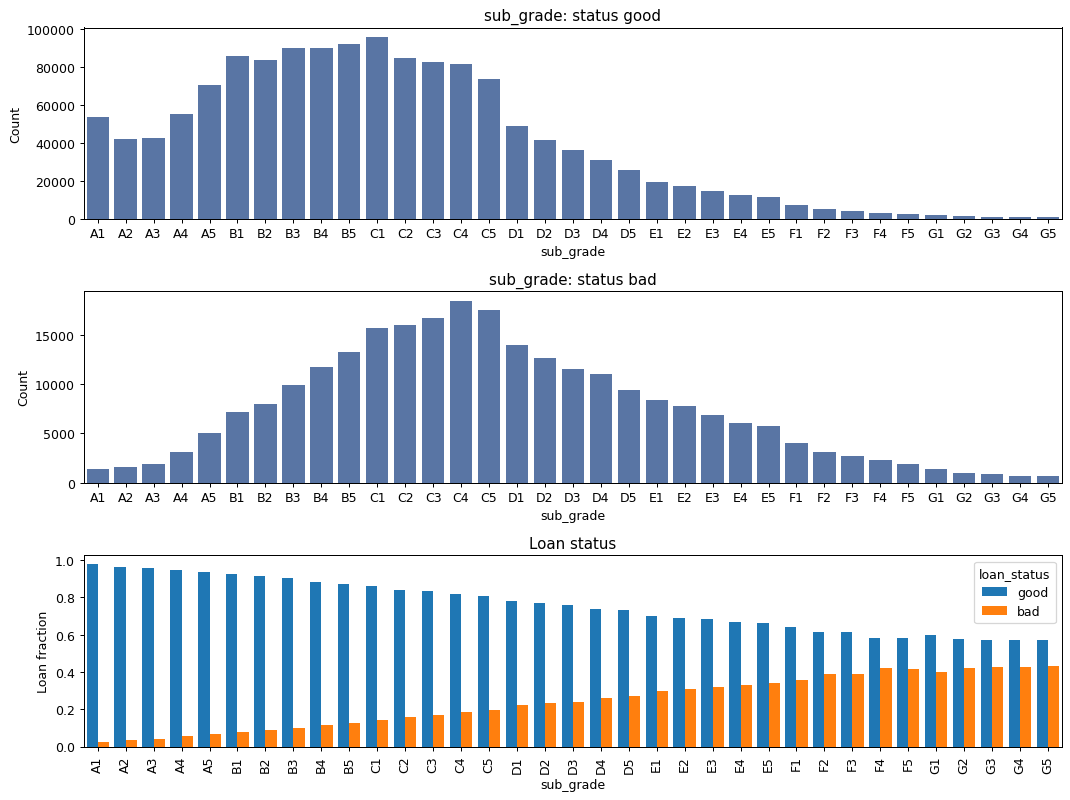

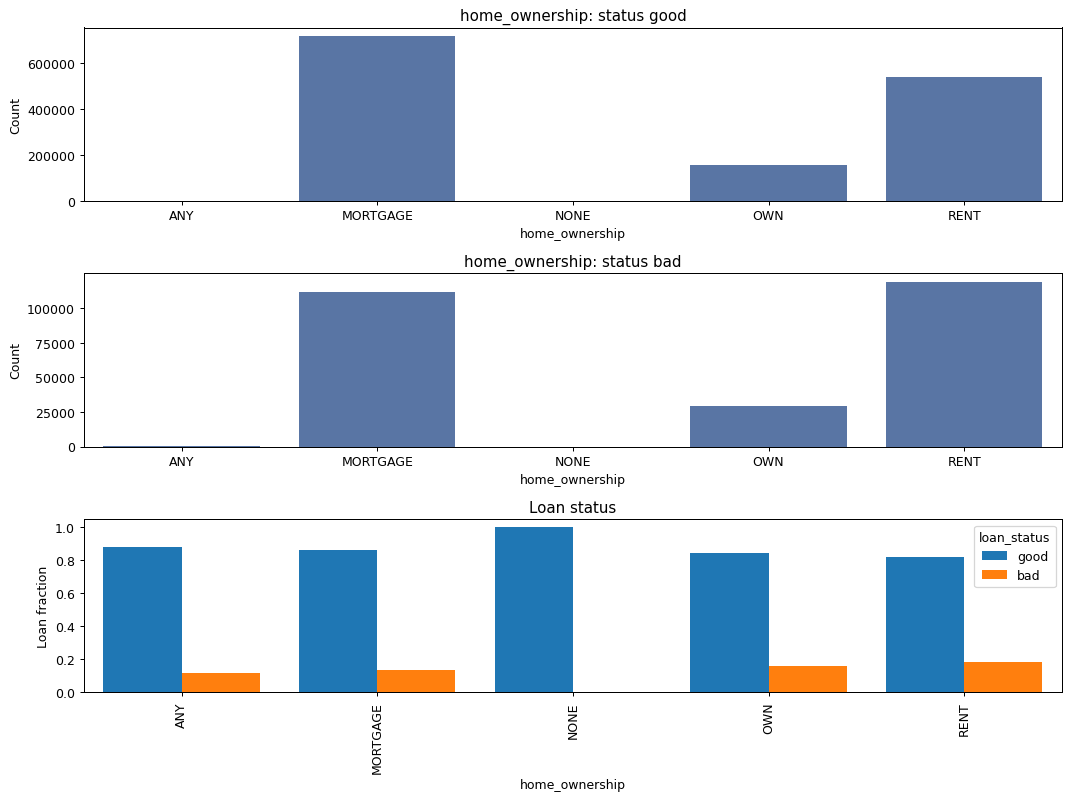

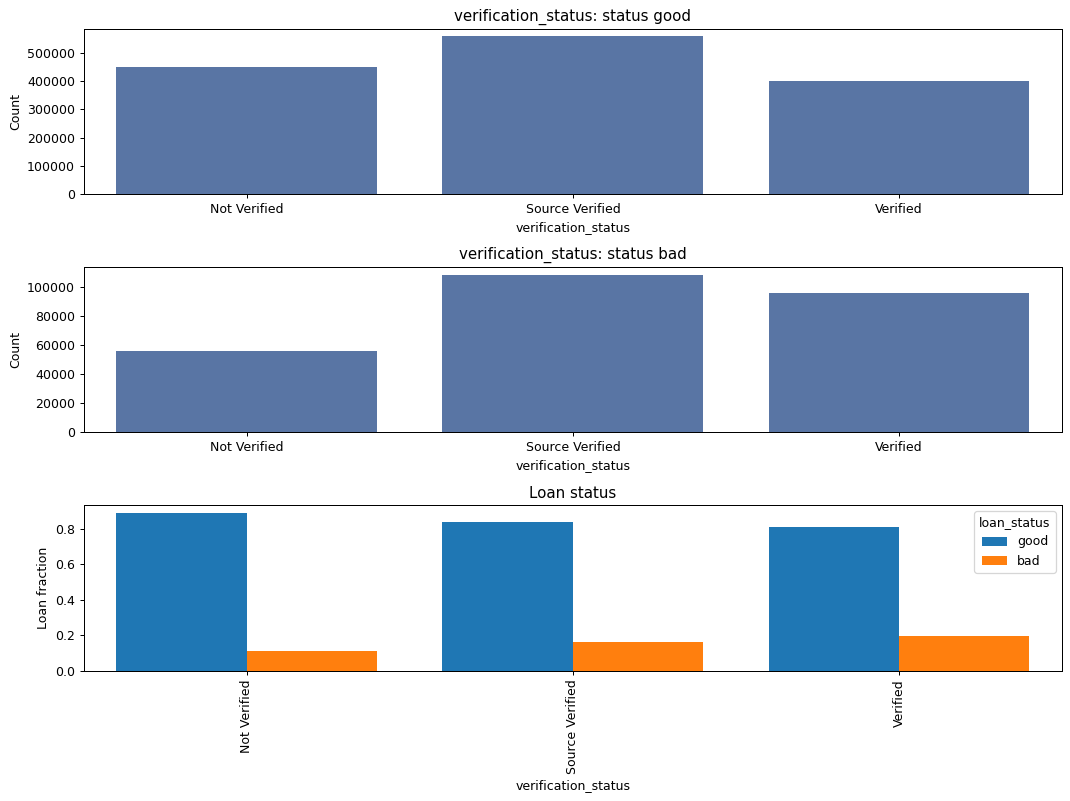

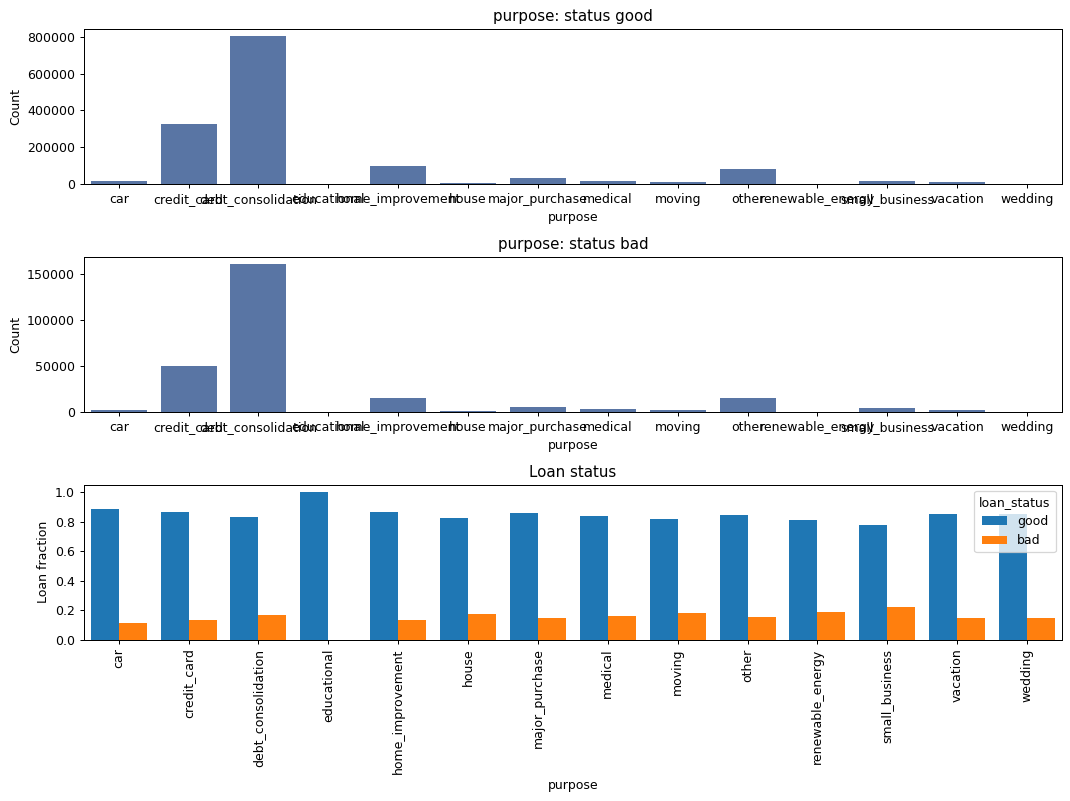

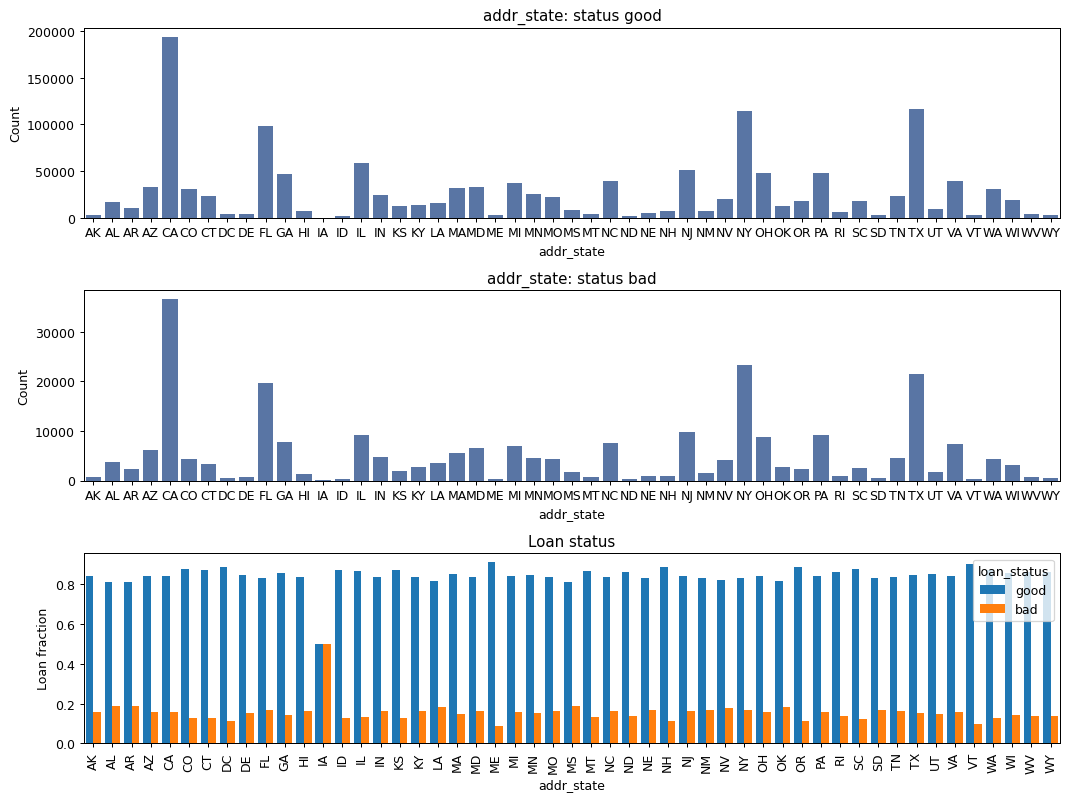

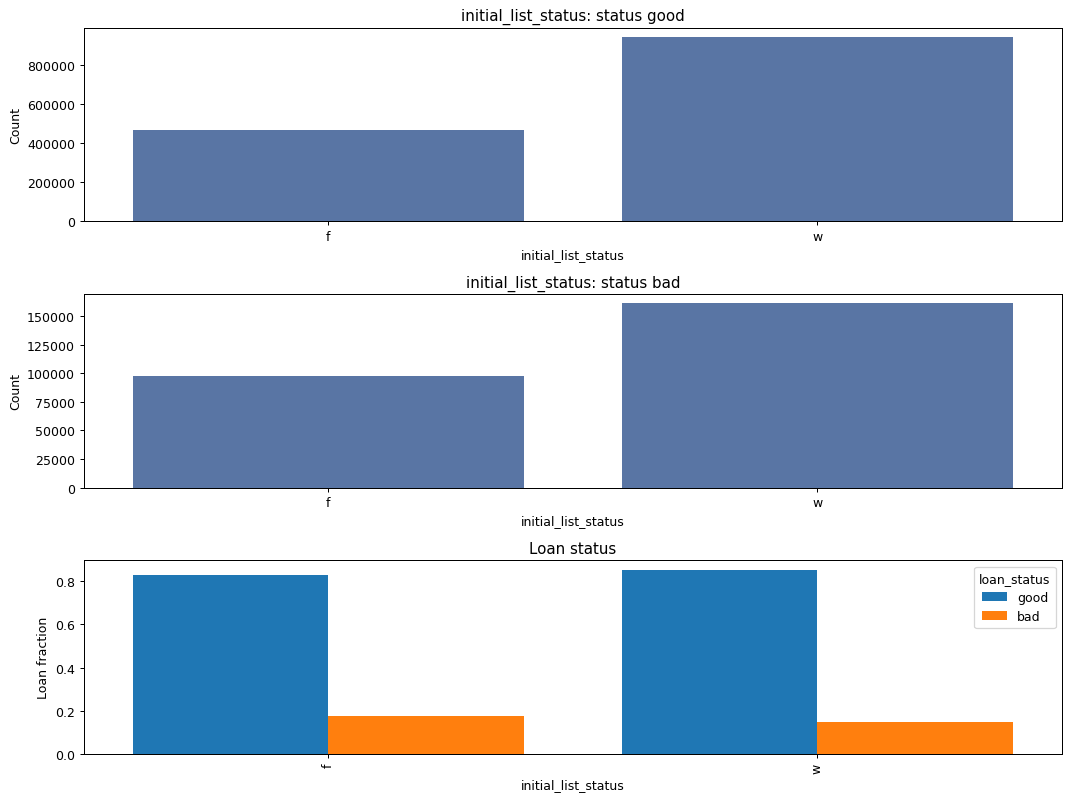

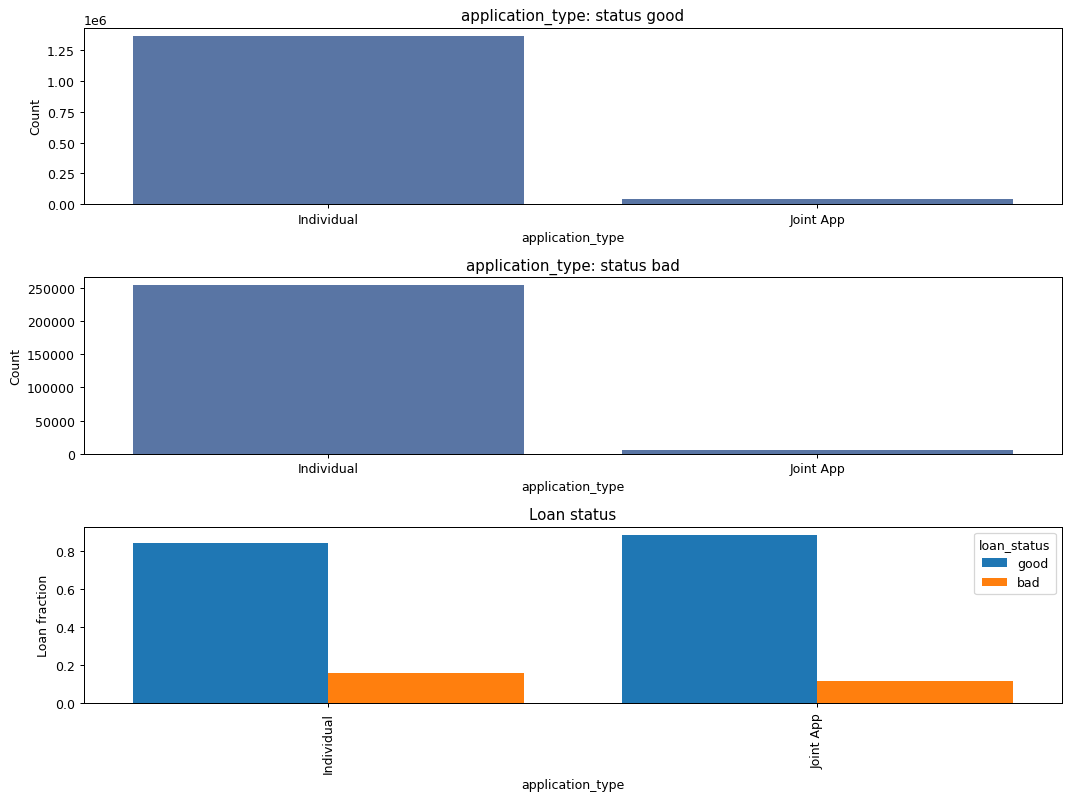

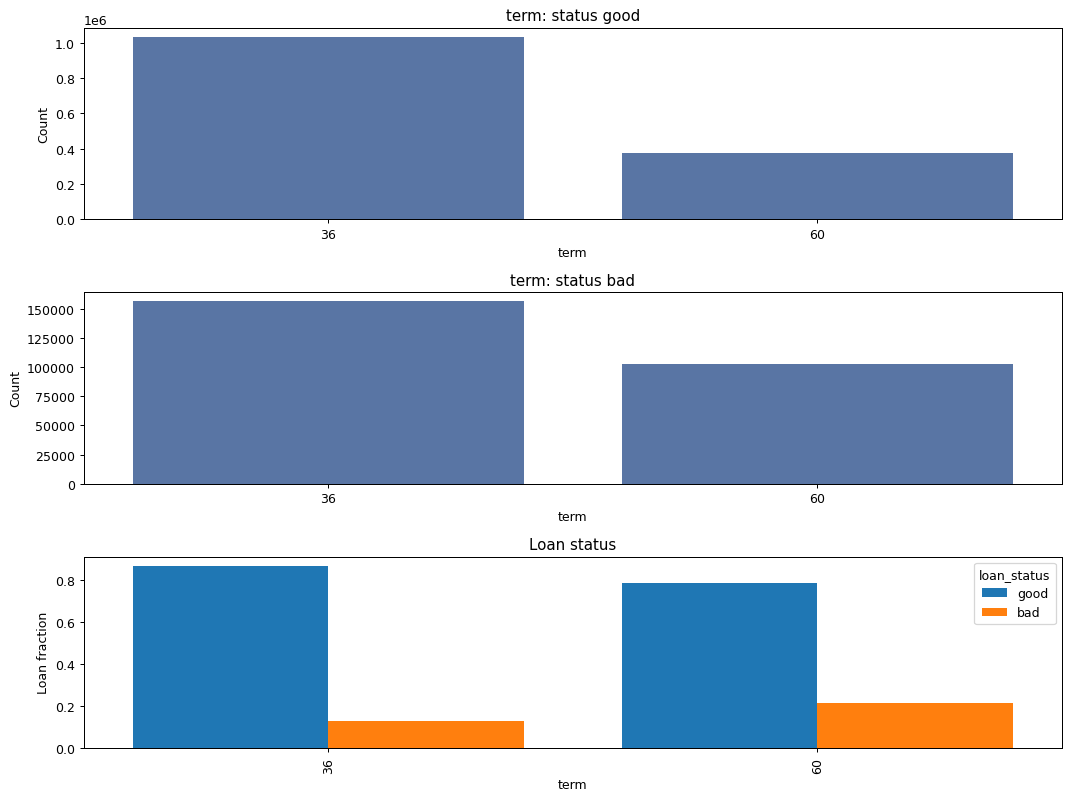

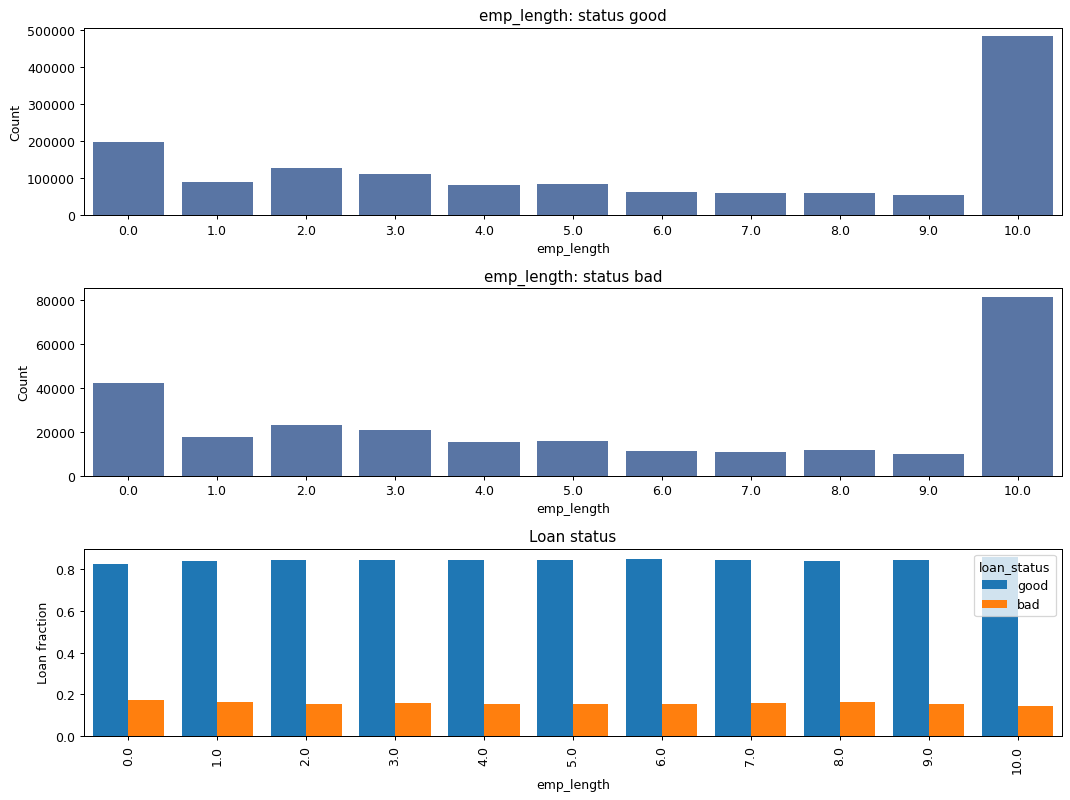

In [43]:
for var in cat_vars:
    plot_feature(loan_data, var, False)

In [49]:
#keep grade instead of subgrade because the bad loan rate under sub_grade G isn't well differentiated

In [53]:
loan_data.drop(['sub_grade'], axis=1, inplace=True)

In [54]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669524 entries, 0 to 1669523
Data columns (total 21 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   loan_amnt                      1669524 non-null  float64
 1   term                           1669524 non-null  int64  
 2   int_rate                       1669524 non-null  float64
 3   grade                          1669524 non-null  object 
 4   emp_length                     1669524 non-null  float64
 5   home_ownership                 1669524 non-null  object 
 6   annual_inc                     1669524 non-null  float64
 7   verification_status            1669524 non-null  object 
 8   purpose                        1669524 non-null  object 
 9   addr_state                     1669524 non-null  object 
 10  dti                            1668945 non-null  float64
 11  revol_bal                      1669524 non-null  float64
 12  initial_list_s

## Splitting Data for WOE analysis

In [55]:
from sklearn.model_selection import train_test_split
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 47652)


In [56]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')


In [57]:
with open("feature_remove.txt", "a") as f:
    for s in columns_to_drop:
        f.write(str(s) +"\n")